<a href="https://colab.research.google.com/github/khanking313/KNN-/blob/main/Lab_Exam_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Lab Exam SE5th  12/26/2023

### Your name: AHMED ILYAS
### Your CMS ID: 56275

### Convert your lab in PDF format after completion and submit your lab here. https://forms.gle/4r8gtm62zFFm1bsJ7

#### you have exactly one hour to complete this. Any submission after 12:15PM WILL BE MARKED 0

## The Dataset includes the quality of wine. Based on its properties, predict whether the color of wine is red or white.

## Beat the baseline of 90% to pass 99% to get full marks


### This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white).

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
### BEGIN SOLUTION
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Wine_Quality_Data.csv", sep=',')

In [ ]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

Convert the color feature to an integer. This is a quick way to do it using Pandas.


In [ ]:
data['color'] = data['color'].astype('category').cat.codes


## Question 1
* check for any duplicate and null values and deal with them. divide the code into x and y

In [ ]:
# your code here for preprocessing

x = data.drop(['color'],axis=1)

y = data['color']
print(x.shape, y.shape)
duplicate_rows = data.duplicated()
print(duplicate_rows)

# Check for null values
null_values = data.isnull()
# print(null_values)
data = data.fillna(data.mean())

NameError: ignored

In [ ]:

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Splitting the data
for train_index, test_index in sss.split(x, y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
data.drop_duplicates()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


## Question 2

*   Check the percent composition of each quality level for both the train and test data sets.


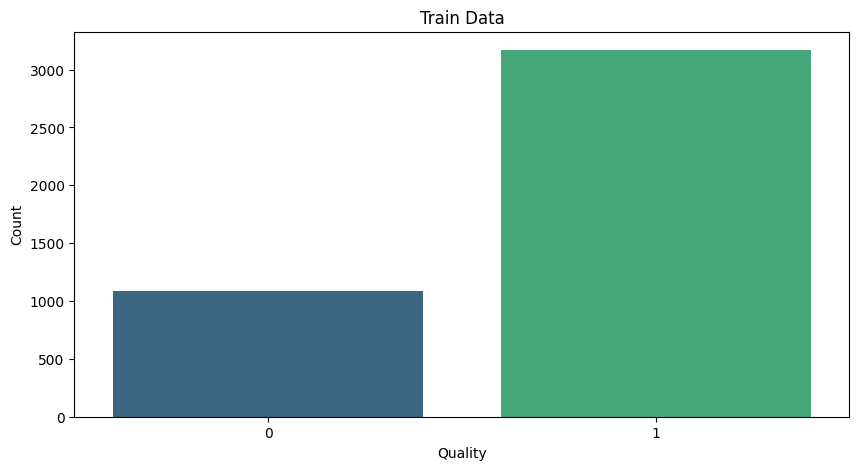

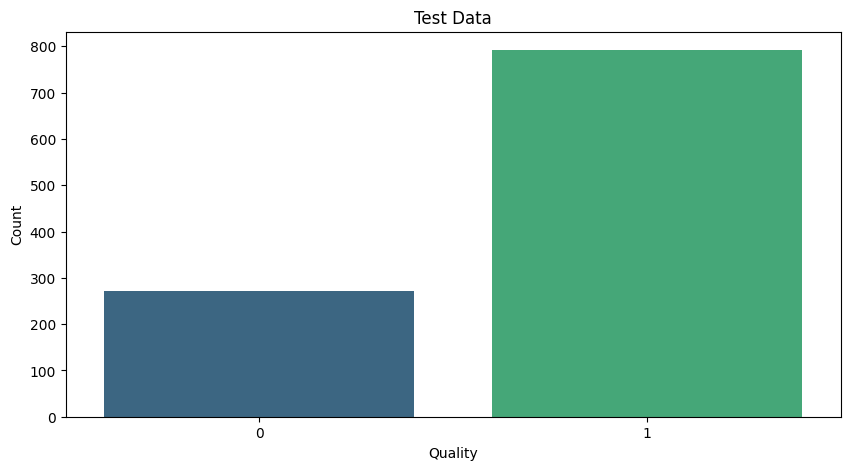

In [ ]:
#your code here
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, palette="viridis")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Train Data")
plt.show()
plt.figure(figsize=(10, 5))
sns.countplot(x=y_test, palette="viridis")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Test Data")
plt.show()

## Question 3
### fit the model in the box below

In [1]:
#your code here
#Testing Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

NameError: ignored

## Question 4
### Evaluate your model on training and testing sets and use the following code to display if your model is overfitting or not

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

y_pred=model.fit(x_test)

scr=f1_score(y_test,y_pred)

NameError: ignored